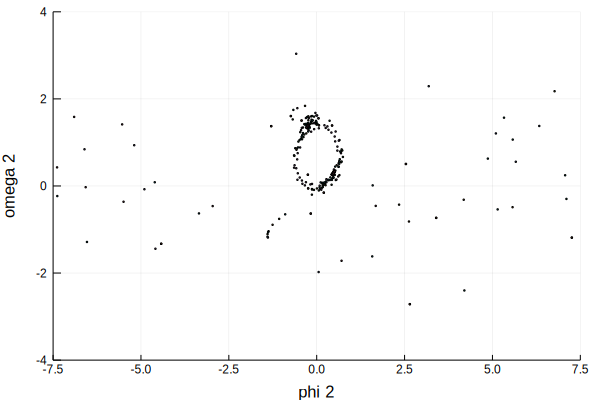

In [86]:
#Poincare section for high energy level
L = -6.99
x1 = -0.66
#for x1 = 
#0.49
#0.5
#0.51
#0.52
#0.53
#0.54
#-0.5
#-0.51
#-0.53
#-0.55
#-0.56
#-0.65
#-0.66
poincaresection(L,x1)

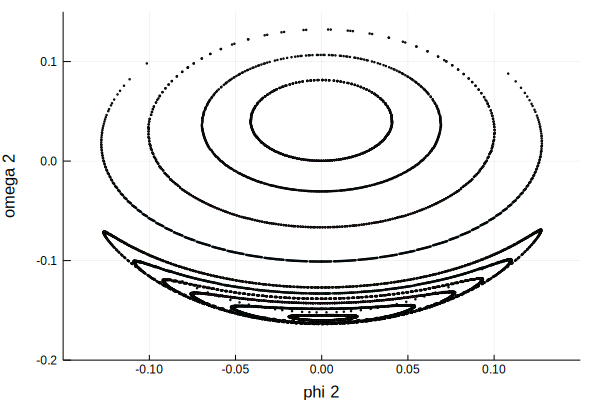

In [547]:
L = 8.99
x1 = -0.039
#For initial conditions x1 = 
#-0.045
#0.02
#0.03
#0.037
#-0.02
#-0.03
#-0.033
#-0.035
#-0.037
#-0.039
poincaresection(L,x1)

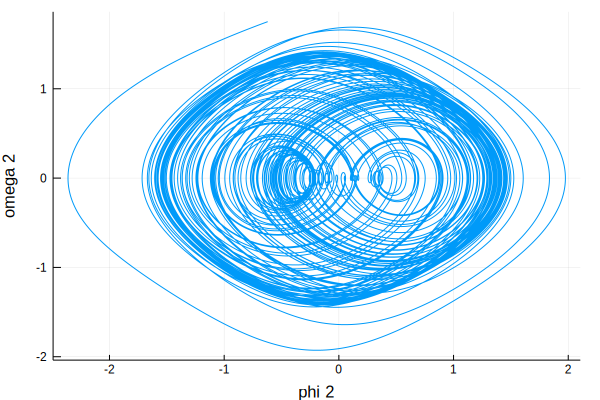

In [101]:
L = -6.99
x = zeros(4)
x[1] = 0.48
x[2] = acos(L+8*cos(x[1]))
Δt=0.01;
t1=0;
t2= 870
t,y = rungekutta4(DoubPen,x,Δt,t1,t2)
plot(y[:,2],y[:,4],legend= :false,xlabel = "phi 2", ylabel = "omega 2")
#plot(t,y[:,1])

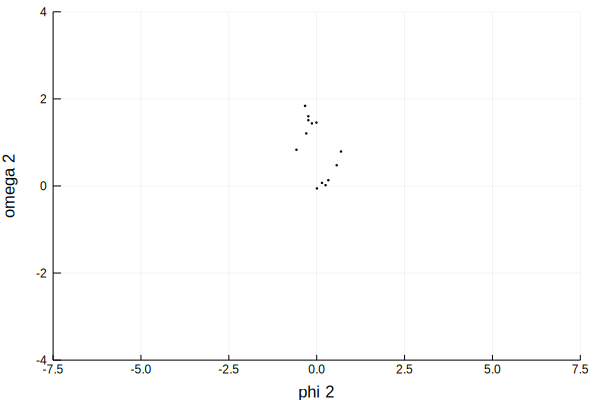

In [71]:
L = -6.99
x1 = 0.52
poincaresection(L,x1)

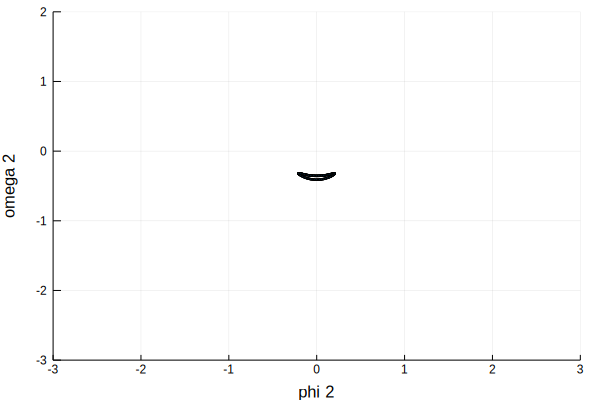

In [63]:
L = 7.01
x1 = 0.08
poincaresection(L,x1)

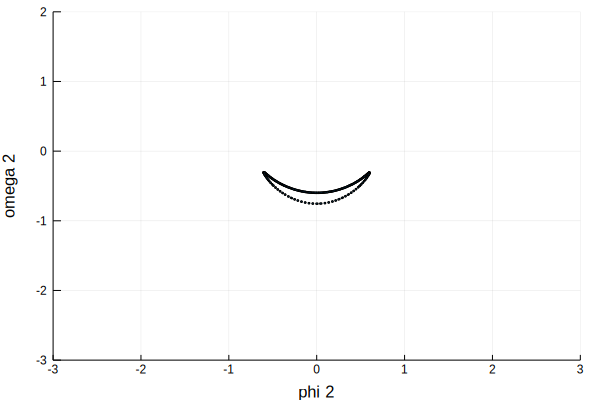

In [242]:
L = 7.01
x1 = 0.15
poincaresection(L,x1)

In [2]:
function DoubPen(t,x)
    #this function defines the motion of a double pendulum using the Lagrangian
    #x = [θ1 θ2 ω1 ω2]
    #I need to definel1,l2,m1,m2
    l1 = 2
    l2 = 1
    m1 = 3
    m2 = 1
    
    dx = zeros(4)
    
    dx[1] = x[3]
    dx[2] = x[4]
    
    
    dx[3] = (1/(l1*(1+m1-cos(x[1]-x[2])^2)))*(sin(x[1]-x[2])*(l1*cos(x[1]-x[2])*x[3]^2+x[4]^2)-(0.5*((1+2*m1)*sin(x[1])+sin(x[1]-2*x[2]))))
    
    dx[4] = sin(x[1]-x[2])*(((1+m1)*(cos(x[1]+l1*x[3]^2))+cos(x[1]-x[2])*x[4]^2))/(1+m1-cos(x[1]-x[2])^2)
    
    dx
end

DoubPen (generic function with 1 method)

In [3]:
function DoubPenDeriv(t,x)
    #this function defines the motion of a double pendulum using the Lagrangian
    #x = [θ1 θ2 ω1 ω2]
    #I need to definel1,l2,m1,m2
    l1 = 2
    l2 = 1
    m1 = 3
    m2 = 1
    
    dx = zeros(4)
    
    dx[1] = x[3]
    dx[2] = x[4]
    
    
    dx[3] = ((-1*sin(x[1]-x[2])*(l1*cos(x[1]-x[2])*x[3]^2-x[4]^2))/(l1*(1+m1-cos(x[1]-x[2])^2)))-((0.5*((1+2*m1)*sin(x[1])+sin(x[1]-2*x[2])))/(l1*(1+m1-cos(x[1]-x[2])^2)))
    
    dx[4] = sin(x[1]-x[2])*(((1+m1)*(cos(x[1]+l1*x[3]^2))+cos(x[1]-x[2])*x[4]^2))/(1+m1-cos(x[1]-x[2])^2)
    
    dx
end

DoubPenDeriv (generic function with 1 method)

In [4]:
function rungekutta4(f, y₀, Δt, t₀, t₁) 
   
    # fix up Δt so it evenly divides time interval
    N = convert(Int64, round((t₁ - t₀)/Δt))
    Δt = (t₁ - t₀)/N
    Δt2 = Δt/2
    Δt6 = Δt/6
    
    t = range(t₀, stop=t₁, length=N+1)

    y = zeros(N+1, length(y₀))
    y[1,:] = y₀

    for n = 1:N
        yn = y[n,:]
        tn = t[n]
        s1 = f(tn, yn)
        s2 = f(tn + Δt2, yn + Δt2*s1)
        s3 = f(tn + Δt2, yn + Δt2*s2)
        s4 = f(tn + Δt,  yn + Δt *s3)

        y[n+1, :] =  yn + Δt6*(s1+2s2 + 2s3 + s4) # RK4 update formula
    end
    t,y
end

rungekutta4 (generic function with 1 method)

In [5]:
using Plots

┌ Info: Recompiling stale cache file C:\Users\Brian Nguyen\.julia\compiled\v1.0\Plots\ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1184


In [6]:
function lagrangian(f,x)
    #The lagrangian of the double pendulum system will be computed here
    l1 = 2
    l2 = 1
    m1 = 3
    m2 = 1
    L = 0
    g = 1

    L = (1/2)*(l1^2*(m1+m2)*x[3]^2+l2^2*m2*x[4]^2+2*l1*m2*cos(x[1]-x[2])*x[3]*x[4])+g*l1*(m1+m2)*cos(x[1])+g*l2*m2*cos(x[2])
            
end

lagrangian (generic function with 1 method)

In [7]:
lagrangian(DoubPen,[0,π,0,0])

7.0

In [73]:
function poincaresection(L,x0)
    #this function will recreate the plot, ϕ2 vs ω2 found in 
    #"A Numerical Analysis of the Double Pendulum System" by Stachowiak and Okada
    
    x = zeros(4)
    
    if L == 8.99
        x[1] = x0
        x[2] = acos(L-8*cos(x[1]))
    end
    
    if L == 7.01 
        x[1] = x0
        x[2] = acos(L-8*cos(x[1])) - π
    end
    
    if L == -6.99
        x[1] = x0
        x[2] = acos(L-8*cos(π+x[1]))
    end
    
    Δt=0.01
    t1=0
    t2=2000
    t,y = rungekutta4(DoubPen,x,Δt,t1,t2)
    
    #memory allocation
    y = copy(y)
    t = copy(t)
    ncross = []
    y1 = []
    y2 = []
    phi2 = 0
    omega2 = 0
    
    #loop over ϕ1 to find roots where ϕ1 equals 0 and ω1=dϕ1 >0
    for n = 2:size(y,1)
        
        #we want roots with a positive slope, so if the previous ϕ1 is negative and the ϕ1 is positive, 
        #then we get a root with a positive slope
        
        if (y[n-1,1]<0) && (y[n,1]>0)
            
            #the index of the neg and positive number is pushed into a pair of empty vectors
            push!(ncross,n)
            
        end 
    end
    
    for i = 1:length(ncross)
        push!(y1,y[ncross[i],2])
        push!(y2,y[ncross[i],4])
    end
    
    #the two vectors containing ϕ2 and ω2 for the poincare section will be plotted here
    plot!(y1,y2,seriestype= :scatter, markersize= 0.5, xlim = (-7.5,7.5),ylim = (-4,4), legend= :false,
        xlabel = "phi 2", ylabel = "omega 2")
    
end

poincaresection (generic function with 1 method)

In [ ]:
for n = 1:size(ncross,1)
        
        #the interpolation for the root is found here
        t0 = t[ncross[n]]+((-y[ncross[n],1])*(t[ncrossing[n]]-t[ncross[n]]))/(y[ncrossing[n],1]-y[ncross[n],1])
        
        #the value of ϕ2 and ω2 will be calculated at t where ϕ1=0
        phi2 = y[ncrossing[n],2] + ((y[ncross[n],2]-y[ncrossing[n],2])*(t0-t[ncrossing[n]]))/(t[ncross[n]]-t[ncrossing[n]])
        omega2 = y[ncrossing[n],4] + ((y[ncross[n],4]-y[ncrossing[n],4])*(t0-t[ncrossing[n]]))/(t[ncross[n]]-t[ncrossing[n]])
        
        #ϕ2 and ω2 will be pushed into an empty vector
        push!(y1,phi2)
        push!(y2,omega2)
        
    end